# Getting started with Task 3

Download the dataset from the [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) using the script `download_intracardiac_dataset.sh`:

```bash
source download_intracardiac_dataset.sh
```

## Load Modules and Preprocessing Functions

Load modules and preprocessing functions.

In [2]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
drive_path = '/content/drive/MyDrive/cardiac_challenge_team6'

Load the `cardiac_ml_tools` module.

In [6]:
%run /content/drive/MyDrive/cardiac_challenge_team6/notebooks/cardiac_ml_tools.py

## Load the dataset

In [7]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR=f'{drive_path}/intracardiac_dataset/' # This should be the path to the intracardiac_dataset, it can be downloaded using data_science_challenge_2023/download_intracardiac_dataset.sh
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[0][0], file_pairs[0][1]))


Number of file pairs: 16117
Example of file pair:
/content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.0.volunteer.v13.npy
/content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/VmData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.0.volunteer.v13.npy


## Dataset details

The dataset [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106)
consists of pairs of computationally simulated intracardiac transmembrane voltage recordings and ECG signals.
In total, 16140 organ-level simulations were conducted to create this dataset.
Simulations were performed using Lassen supercomputer at Lawrence Livermore National Lab (LLNL), concurrently utilizing 4 GPUs and 40 CPU cores.
Each simulation produced pairs of 500ms-by-10 raw electrode signals and 500ms-by-75 transmembrane voltage signals.
For convenience, we collect those signals in matrices and give them the following names:

Tensor | Description | Shape | Notes
--- | --- | --- | ---
$X$ | Row electrode signals | $10 \times 500$ | 10-lead ECG signals from the simulated torso (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$V$ | Activation map | $75 \times 500$ | Transmembrane voltage signals from the simulated heart (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$E$ | 12-lead ECG signals | $12 \times 500$ | 12-lead ECG signals obtained by `get_standard_leads`($X$)
$A$ | Activation map | $75 \times 1$ | Activation time, defined as $A_i = \text{min}_j(V_{ij})$

**IMPORTANT** : The raw data in the dataset consists of 10-lead ECG signals and 75-lead transmembrane voltage signals. The 12-lead ECG signals are obtained from the 10-lead ECG signals using the function `get_standard_leads` (in the file `cardiac_ml_tools.py`).

The overall generation process is shown in the following image. The ECG signal is recorded using 10 virtual electrodes and the transmembrane voltages are recorded at 75 points within the myocardium. The transmembrane voltages are then used to generate the spatio-temporal activation maps.

![ECG 10 2 12](../figures/data_generation.png)

## Getting the standard 12-lead ECG from the 10-lead ECG

The function `get_standard_leads` (in the file `cardiac_ml_tools.py`) is used to obtain the 12-lead ECG signals from the 10-lead ECG signals. It implements the following transformation, where the (Wilson Lead) is defined as $Vw = 1/3*(RA + LA + LL)$:
$$
\left\{
\begin{array}{lll}
    X_{:,1}  & \to  & RA \\
    X_{:,2}  & \to  & LA \\
    X_{:,3}  & \to  & LL \\
    X_{:,4}  & \to  & RL \\
    X_{:,5}  & \to  & V1 \\
    X_{:,6}  & \to  & V2 \\
    X_{:,7}  & \to  & V3 \\
    X_{:,8}  & \to  & V4 \\
    X_{:,9}  & \to  & V5 \\
    X_{:,10} & \to &  V6 \\
\end{array}
\right.
\text{        and        }
\left\{
\begin{array}{lll}          
\text{Lead } I& : & LA - RA \\
\text{Lead } II& : & LL - RA \\
\text{Lead } III& : & LL - LA \\
\text{Lead } aVR& : &  \frac{3}{2} (RA - Vw) \\
\text{Lead } aVL& : &  \frac{3}{2} (LA - Vw) \\
\text{Lead } aVF& : &  \frac{3}{2} (LL - Vw)\\
\text{Lead } V1 & : & V1 - Vw \\
\text{Lead } V2 & : & V2 - Vw \\
\text{Lead } V3 & : & V3 - Vw \\
\text{Lead } V4 & : & V4 - Vw \\
\text{Lead } V5 & : & V5 - Vw \\
\text{Lead } V6 & : & V6 - Vw \\
\end{array}
\right.
$$

In [50]:
pECGData[0]

array([-0.00220332, -0.00178963,  0.00041369,  0.00199648, -0.00130851,
       -0.00068797, -0.00060416, -0.00201922, -0.00211653, -0.001999  ,
       -0.00047397,  0.00021415])

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


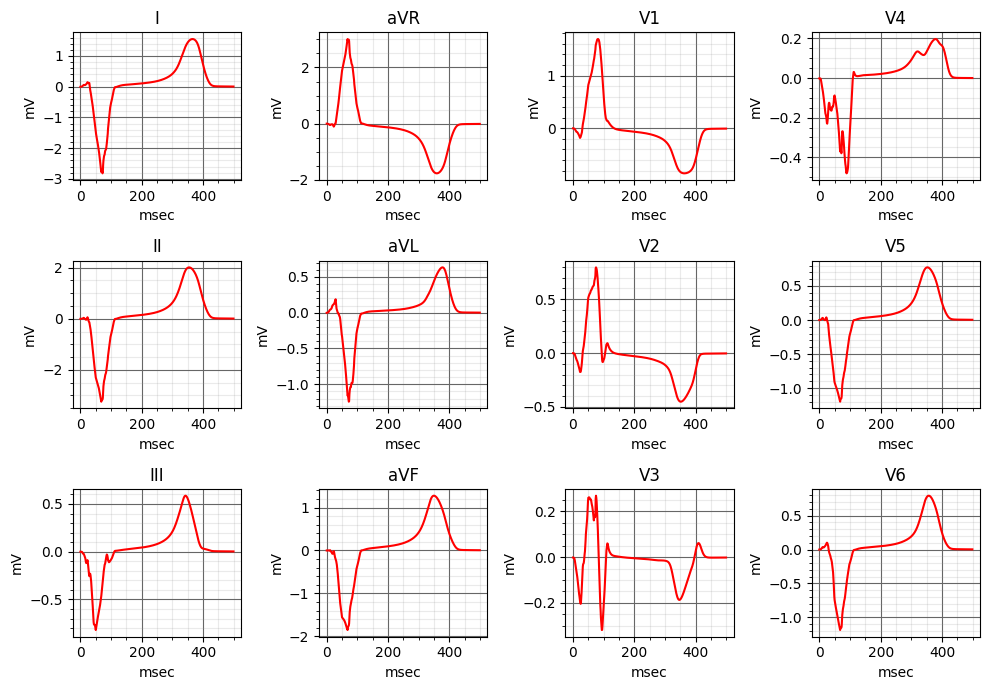

In [8]:
# Example of file pair
case = 213
# ECG plot
row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

## Getting the activation map from the transmembrane voltages

The funtion `get_activation_map` (in the file `cardiac_ml_tools.py`) is used to obtain the activation map from the transmembrane voltages. It implements the following transformation $A_i = \text{min}_j(V_{ij})$.

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


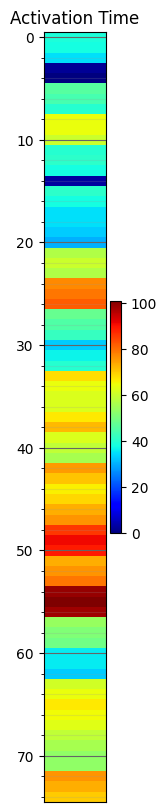

In [ ]:
# Example of file pair
case = 213
plt.figure(figsize=(1, 10))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

ActTime = get_activation_time(VmData)

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


In [ ]:
ActTime.shape

(75, 1)

## Task 3: Learning the mapping from the 12-lead ECG to the activation map

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy
Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


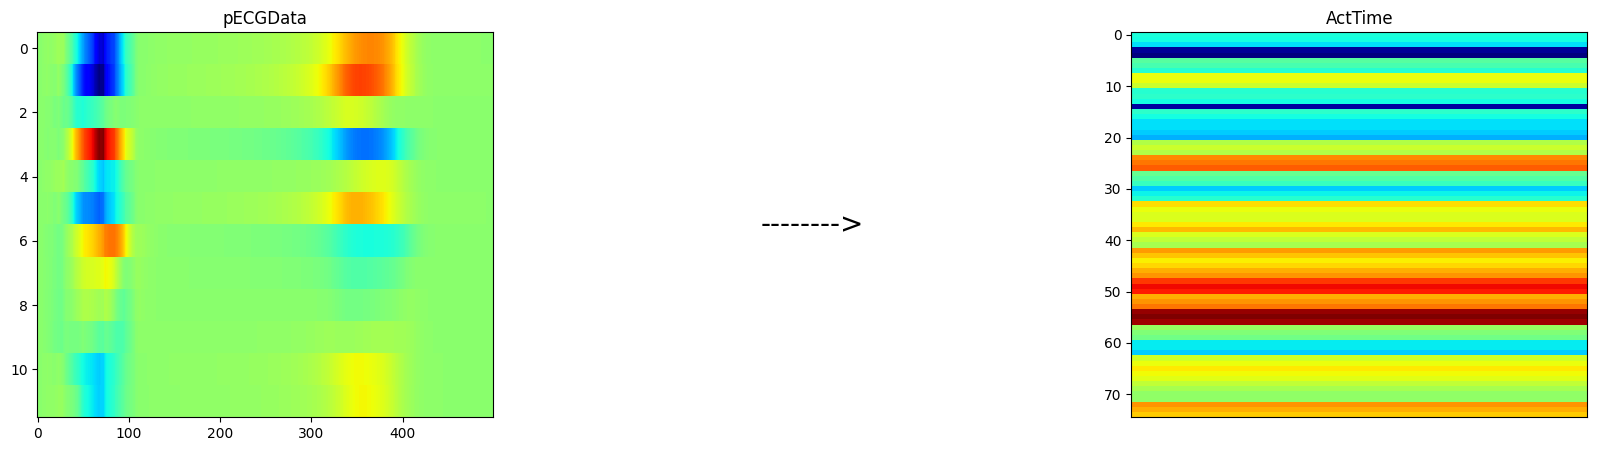

In [ ]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])
ActTime = get_activation_time(VmData)

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print an arrow
plt.text(0.5, 0.5, '-------->', horizontalalignment='center', verticalalignment='center', fontsize=20)
plt.axis('off')
plt.subplot(row, column, 3)
# plot ActTime
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('ActTime')
plt.show()
plt.close()

In [ ]:
pECGData.shape

(500, 12)

In [ ]:
ActTime.shape

(75, 1)

# Tricks

- As in many machine learning problems, normalization of the data might be helpful or even necessary. Different normalization schemes might be applied.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_length, input_channels)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X = np.empty((len(file_pairs), 500, 12))
y = np.empty((len(file_pairs), 75, 1))

# Load data into X and y arrays
for i, file_pair in enumerate(file_pairs):
    pECG = np.load(file_pair[0])
    X[i] = get_standard_leads(pECG)
    VmData = np.load(file_pair[1])
    y[i] = get_activation_time(VmData)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X = np.load('/content/drive/MyDrive/cardiac_challenge_team6/Task_3_4_Data/ECG_Data.npy')

In [10]:
y = np.load('/content/drive/MyDrive/cardiac_challenge_team6/Task_3_4_Data/Activation_Times.npy')

In [44]:
y[0]

array([[ 9],
       [ 5],
       [ 2],
       [ 7],
       [ 3],
       [ 1],
       [ 8],
       [ 5],
       [ 2],
       [ 8],
       [ 8],
       [ 4],
       [ 7],
       [ 1],
       [12],
       [12],
       [ 2],
       [ 5],
       [ 8],
       [11],
       [ 7],
       [ 3],
       [ 8],
       [ 5],
       [ 1],
       [ 9],
       [ 5],
       [ 2],
       [ 4],
       [ 9],
       [ 5],
       [ 4],
       [11],
       [ 4],
       [11],
       [ 6],
       [ 2],
       [ 3],
       [ 9],
       [13],
       [12],
       [ 8],
       [ 2],
       [11],
       [ 7],
       [11],
       [ 7],
       [ 2],
       [ 2],
       [15],
       [10],
       [ 3],
       [ 5],
       [ 1],
       [ 4],
       [ 8],
       [ 2],
       [ 4],
       [10],
       [ 4],
       [ 8],
       [ 2],
       [ 5],
       [ 2],
       [ 5],
       [ 8],
       [ 4],
       [10],
       [ 4],
       [11],
       [ 7],
       [ 3],
       [ 3],
       [ 8],
       [13]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the model
model = Sequential()

# Add a 1D convolutional layer with 32 filters, each of size 3
model.add(Conv1D(32, 3, activation='relu', input_shape=(500, 12)))

# Add a max pooling layer
model.add(MaxPooling1D(2))

# Flatten the feature maps
model.add(Flatten())

# Add a fully connected layer with 64 units
model.add(Dense(64, activation='relu'))

# Add the output layer with 75 units (assuming a 75x1 output)
model.add(Dense(75, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 498, 32)           1184      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 249, 32)          0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 7968)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                510016    
                                                                 
 dense_15 (Dense)            (None, 75)                4875      
                                                                 
Total params: 516,075
Trainable params: 516,075
Non-trainable params: 0
________________________________________________

In [33]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
403/403 [==============================] - 12s 30ms/step - loss: 225.9745
Epoch 2/10
403/403 [==============================] - 10s 25ms/step - loss: 221.8109
Epoch 3/10
403/403 [==============================] - 8s 20ms/step - loss: 216.9333
Epoch 4/10
403/403 [==============================] - 10s 24ms/step - loss: 212.6704
Epoch 5/10
403/403 [==============================] - 8s 20ms/step - loss: 209.8442
Epoch 6/10
403/403 [==============================] - 9s 23ms/step - loss: 205.8673
Epoch 7/10
403/403 [==============================] - 10s 24ms/step - loss: 203.0478
Epoch 8/10
403/403 [==============================] - 8s 19ms/step - loss: 199.9608
Epoch 9/10
403/403 [==============================] - 10s 24ms/step - loss: 196.4617
Epoch 10/10
403/403 [==============================] - 8s 21ms/step - loss: 194.1150


In [34]:
# Evaluate the model on training data (optional)
train_loss = model.evaluate(X_train, y_train)

# Print training accuracy
print("Training Loss:", train_loss)


403/403 [==============================] - 3s 7ms/step - loss: 193.3089
Training Loss: 193.30886840820312


In [35]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and obtained predictions for the training data
y_pred_train = model.predict(X_train)

# Convert the predicted probabilities to labels
y_pred_train_labels = np.argmax(y_pred_train, axis=1)

# Convert the true labels to 1D array if needed
y_train_labels = np.argmax(y_train, axis=1)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_labels, y_pred_train_labels)

# Print training accuracy
print("Training Accuracy:", train_accuracy)


403/403 [==============================] - 3s 7ms/step
Training Accuracy: 0.23330489412859692
